In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Input, concatenate
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import cv2

In [ ]:
import os
dataset_path = "/content/drive/MyDrive/Intel/EAuto/photos"
def count(dataset_path):
  sum = 0
  for brands in os.listdir(dataset_path):
    brand_path = os.path.join(dataset_path,brands)
    sum = sum + len(os.listdir(brand_path))
    print(brands,":",len(os.listdir(brand_path)))
  print(sum)
count(dataset_path)

Nissan : 322
Ford : 264
Tata : 286
Suzuki : 308
Volkswagen : 149
Renault : 322
Toyota : 341
Hyundai : 358
Honday : 33
2383


In [ ]:
# Define image size for resizing
image_height, image_width = 224, 224

In [ ]:
def load_preprocess_dataset(data_path):
    images = []
    labels = []

    # Loop through the data path and load images and labels
    for brand_name in os.listdir(data_path):
        brand_path = os.path.join(data_path, brand_name)
        if not os.path.isdir(brand_path):
            continue

        for img_name in os.listdir(brand_path):
          if img_name.endswith(".jpeg"):
            img_path = os.path.join(brand_path, img_name)
            print("Loading image:", img_path)
            img = cv2.imread(img_path)
            if img is None:
                print("Error loading image:", img_path)
                continue
            img = cv2.resize(img, (image_width, image_height))
            images.append(img)
            labels.append(brand_name)

    # Convert the image and label lists to arrays
    images = np.array(images)
    labels = np.array(labels)

    # Encode labels as integers
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # One-hot encode the labels
    labels_onehot = to_categorical(labels_encoded)

    return images, labels_onehot, label_encoder.classes_

# # Load and preprocess the dataset
# X, y, class_names = load_preprocess_dataset(data_path)


In [ ]:
# Load and preprocess the dataset
X, y, class_names = load_preprocess_dataset(dataset_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shape of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Number of classes:", len(class_names))

Loading image: /content/drive/MyDrive/Intel/MdEndan_EAuto/photos/Nissan/frontfacingNissancar1.jpeg
Loading image: /content/drive/MyDrive/Intel/MdEndan_EAuto/photos/Nissan/frontfacingNissancar7.jpeg
Loading image: /content/drive/MyDrive/Intel/MdEndan_EAuto/photos/Nissan/frontfacingNissancar5.jpeg
Loading image: /content/drive/MyDrive/Intel/MdEndan_EAuto/photos/Nissan/frontfacingNissancar6.jpeg
Loading image: /content/drive/MyDrive/Intel/MdEndan_EAuto/photos/Nissan/frontfacingNissancar11.jpeg
Loading image: /content/drive/MyDrive/Intel/MdEndan_EAuto/photos/Nissan/frontfacingNissancar10.jpeg
Loading image: /content/drive/MyDrive/Intel/MdEndan_EAuto/photos/Nissan/frontfacingNissancar14.jpeg
Loading image: /content/drive/MyDrive/Intel/MdEndan_EAuto/photos/Nissan/frontfacingNissancar15.jpeg
Loading image: /content/drive/MyDrive/Intel/MdEndan_EAuto/photos/Nissan/frontfacingNissancar13.jpeg
Loading image: /content/drive/MyDrive/Intel/MdEndan_EAuto/photos/Nissan/frontfacingNissancar12.jpeg
Load

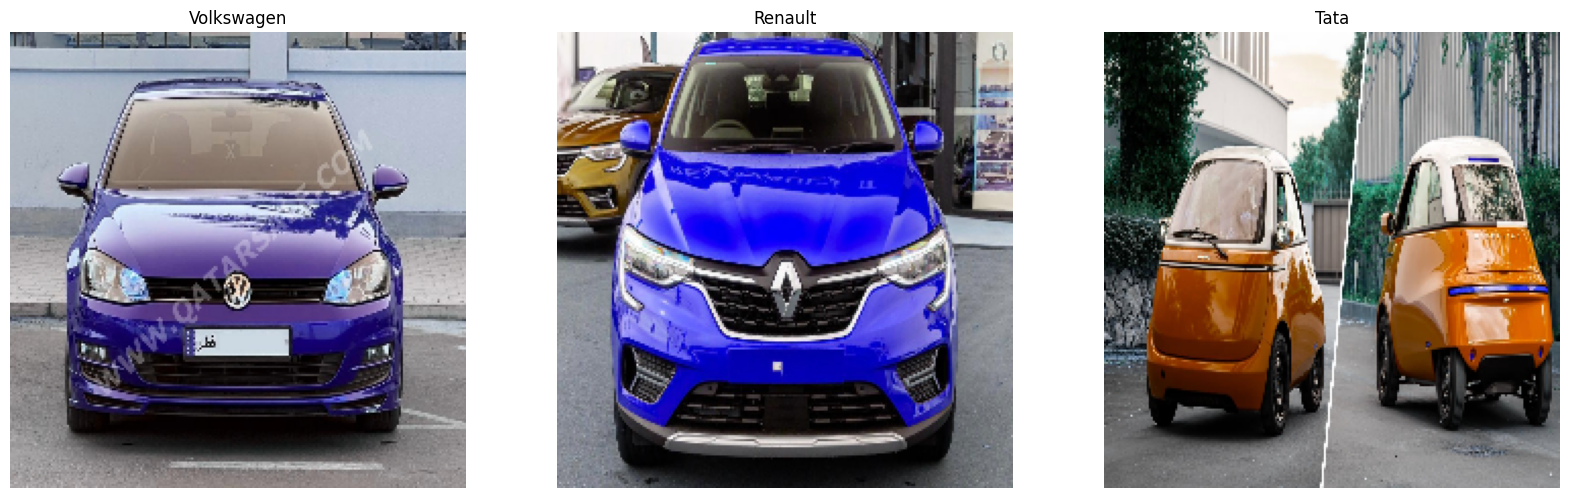

In [ ]:
import matplotlib.pyplot as plt

# Function to get the label name for a given one-hot encoded label
def get_label_name(label_encoded, label_encoder):
    return label_encoder.inverse_transform([np.argmax(label_encoded)])[0]

# Visualize random images and their corresponding labels from the training set
num_images_to_visualize = 3
indices_to_visualize = np.random.randint(0, len(X_train), num_images_to_visualize)

plt.figure(figsize=(20, 8))

for i, index in enumerate(indices_to_visualize):
    plt.subplot(1, num_images_to_visualize, i + 1)
    plt.imshow(X_train[index])
    plt.title(class_names[np.argmax(y_train[index])])
    plt.axis('off')

plt.show()


In [ ]:
# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_labels, y_pred)
    confusion = confusion_matrix(y_test_labels, y_pred)
    classification_rep = classification_report(y_test_labels, y_pred, zero_division=0)

    return accuracy, confusion, classification_rep


##Model 1: Basic CNN
Explanation: This model is a simple Convolutional Neural Network (CNN) with a few convolutional layers, pooling layers, and fully connected layers. It is suitable for small to medium-sized datasets and straightforward image recognition tasks.

In [ ]:
# Model 1: Convolutional Neural Network (CNN)
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dense(len(class_names), activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate CNN model
accuracy_cnn, confusion_cnn, classification_rep_cnn = evaluate_model(model_cnn, X_test, y_test)
print(accuracy_cnn)
print(confusion_cnn)
print(classification_rep_cnn)

Epoch 1/10
60/60 [==============================] - 6s 58ms/step - loss: 52.6695 - accuracy: 0.1704 - val_loss: 2.1811 - val_accuracy: 0.1371
Epoch 2/10
60/60 [==============================] - 3s 49ms/step - loss: 1.9868 - accuracy: 0.2695 - val_loss: 2.1731 - val_accuracy: 0.1878
Epoch 3/10
60/60 [==============================] - 3s 49ms/step - loss: 1.5937 - accuracy: 0.4393 - val_loss: 2.4219 - val_accuracy: 0.2236
Epoch 4/10
60/60 [==============================] - 3s 48ms/step - loss: 1.0251 - accuracy: 0.6646 - val_loss: 3.0039 - val_accuracy: 0.2384
Epoch 5/10
60/60 [==============================] - 3s 50ms/step - loss: 0.6139 - accuracy: 0.8254 - val_loss: 4.0235 - val_accuracy: 0.2595
Epoch 6/10
60/60 [==============================] - 3s 50ms/step - loss: 0.3490 - accuracy: 0.9177 - val_loss: 3.7443 - val_accuracy: 0.2574
Epoch 7/10
60/60 [==============================] - 4s 63ms/step - loss: 0.2708 - accuracy: 0.9425 - val_loss: 4.7823 - val_accuracy: 0.2257
Epoch 8/10
6

##Model 2: Transfer Learning (VGG16)
Explanation: This model utilizes transfer learning, where a pre-trained VGG16 model is used as a feature extractor. Only the top layers are added and trained for the specific task. Transfer learning is effective when you have a limited dataset and want to leverage the knowledge of a well-trained model.

In [ ]:
 #Model 2: Transfer Learning with Pretrained Model (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(class_names), activation='softmax')(x)
model_transfer_learning = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_transfer_learning.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the transfer learning model
model_transfer_learning.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate transfer learning model
accuracy_tl, confusion_tl, classification_rep_tl = evaluate_model(model_transfer_learning, X_test, y_test)
print(accuracy_tl)
print(confusion_tl)
print(classification_rep_tl)

58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/10
60/60 [==============================] - 25s 325ms/step - loss: 8.6137 - accuracy: 0.1366 - val_loss: 6.4271 - val_accuracy: 0.1414
Epoch 2/10
60/60 [==============================] - 9s 152ms/step - loss: 5.3533 - accuracy: 0.1951 - val_loss: 5.2203 - val_accuracy: 0.2131
Epoch 3/10
60/60 [==============================] - 10s 164ms/step - loss: 4.1549 - accuracy: 0.2558 - val_loss: 4.5906 - val_accuracy: 0.2426
Epoch 4/10
60/60 [==============================] - 9s 153ms/step - loss: 3.4179 - accuracy: 0.3001 - val_loss: 4.0105 - val_accuracy: 0.2743
Epoch 5/10
60/60 [==============================] - 10s 160ms/step - loss: 2.8555 - accuracy: 0.3439 - val_loss: 3.8164 - val_accuracy: 0.2932
Epoch 6/10
60/60 [==============================] - 10s 164ms/step - loss: 2.5016 - accuracy: 0.3808 - val_loss: 3.5715 - val_accuracy: 0.3333
Epoch 7/10
60/60 [==============================] - 10s 169ms/step - loss: 2.15

##Model 3: CNN with Attention Mechanism
Explanation: This model incorporates an attention mechanism to focus on important parts of the image. Attention mechanisms are helpful in identifying critical features and improving model performance.

In [ ]:
# Model 3: Convolutional Neural Network with Attention Mechanism
input_tensor = Input(shape=(image_height, image_width, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add an attention mechanism to focus on important parts of the image
attention = Dense(512, activation='sigmoid')(x)
x = tf.keras.layers.Multiply()([x, attention])

predictions_attention = Dense(len(class_names), activation='softmax')(x)
model_attention = Model(inputs=input_tensor, outputs=predictions_attention)

model_attention.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with attention mechanism
model_attention.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model with attention mechanism
accuracy_attention, confusion_attention, classification_rep_attention = evaluate_model(model_attention, X_test, y_test)
print(accuracy_attention)
print(confusion_attention)
print(classification_rep_attention)


Epoch 1/10
60/60 [==============================] - 31s 445ms/step - loss: 14.7428 - accuracy: 0.1266 - val_loss: 2.1893 - val_accuracy: 0.1055
Epoch 2/10
60/60 [==============================] - 27s 454ms/step - loss: 2.1304 - accuracy: 0.1319 - val_loss: 2.1217 - val_accuracy: 0.1160
Epoch 3/10
60/60 [==============================] - 25s 426ms/step - loss: 2.1163 - accuracy: 0.1371 - val_loss: 2.1267 - val_accuracy: 0.1034
Epoch 4/10
60/60 [==============================] - 26s 433ms/step - loss: 2.1043 - accuracy: 0.1519 - val_loss: 2.1159 - val_accuracy: 0.1392
Epoch 5/10
60/60 [==============================] - 26s 436ms/step - loss: 2.1010 - accuracy: 0.1651 - val_loss: 2.2907 - val_accuracy: 0.1034
Epoch 6/10
60/60 [==============================] - 27s 443ms/step - loss: 2.1099 - accuracy: 0.1519 - val_loss: 2.1157 - val_accuracy: 0.1477
Epoch 7/10
60/60 [==============================] - 26s 433ms/step - loss: 2.0966 - accuracy: 0.1477 - val_loss: 2.1239 - val_accuracy: 0.158

##Model 4: SVM (Support Vector Machine)
Explanation: The SVM model is a classical machine learning algorithm used for classification tasks. It aims to find the optimal hyperplane that best separates different classes in the feature space. SVM is effective for binary and multiclass classification and can work well with a small to medium-sized dataset.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the data (assuming you have the dataset loaded)
# X: Features (images), y: Labels (car brand names)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using a pre-trained CNN (VGG16 in this case)
def extract_features(model, X):
    features = model.predict(X)
    return features.reshape(features.shape[0], -1)

# Load and compile the VGG16 model
input_shape = (image_height, image_width, 3)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Extract features for SVM training and testing
X_train_features = extract_features(base_model, X_train)
X_test_features = extract_features(base_model, X_test)

# Train an SVM classifier using the extracted features
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate SVM model
y_pred_svm = svm_model.predict(X_test_features)
accuracy_svm = accuracy_score(np.argmax(y_test, axis=1), y_pred_svm)
confusion_svm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_svm)
classification_rep_svm = classification_report(np.argmax(y_test, axis=1), y_pred_svm)

# Report on the SVM model
print("\nModel: SVM with Image Features")
print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:")
print(confusion_svm)
print("Classification Report:")
print(classification_rep_svm)


15/15 [==============================] - 2s 150ms/step

Model: SVM with Image Features
Accuracy: 0.47890295358649787
Confusion Matrix:
[[29  0  9 10  2  2  1  5  2]
 [ 0  0  2  1  1  1  0  3  0]
 [ 9  0 36  2  4  5  3  5  1]
 [ 9  1  6 26  2  5  9 10  1]
 [ 3  0  8  4 41  5  1  2  0]
 [ 6  0  5  6  2 19  6  5  0]
 [ 1  0  3  7  1  6 30  1  0]
 [ 3  1  9  9  2 10  6 35  1]
 [ 3  0  5  2  3  2  3  5 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        60
           1       0.00      0.00      0.00         8
           2       0.43      0.55      0.49        65
           3       0.39      0.38      0.38        69
           4       0.71      0.64      0.67        64
           5       0.35      0.39      0.37        49
           6       0.51      0.61      0.56        49
           7       0.49      0.46      0.48        76
           8       0.69      0.32      0.44        34

    accuracy                 

In [ ]:
# Define the specific path to save the models
save_path = '/content/drive/MyDrive/Intel/MdEndan_EAuto/models/'

# Save Model 1: Basic CNN
model_cnn.save(save_path + 'model_basic.h5')

# Save Model 2: Transfer Learning (VGG16)
model_transfer_learning.save(save_path + 'model_transfer_learning.h5')

# Save Model 3: CNN with Attention Mechanism
model_attention.save(save_path + 'model_cnn_attention.h5')

# # Save Model 4: SVM Model
# svm_model.save(save_path + 'svm_model.h5')


In [ ]:
# !pip install joblib
import joblib
# Save Model 4: SVM Model
joblib.dump(svm_model, save_path + 'svm_model.joblib')

['/content/drive/MyDrive/Intel/MdEndan_EAuto/models/svm_model.joblib']

#Based on the evaluation results of the four models, here is a summary:

###__Basic CNN Model:__

__Accuracy: 0.2384__  
The basic CNN model achieved low accuracy and F1-score on the test set. It may not be suitable for this task due to limited capacity to learn complex patterns.
###__Transfer Learning (VGG16) Model:__

__Accuracy: 0.3586__  
The VGG16-based transfer learning model showed an improvement over the basic CNN model. It has a higher accuracy and F1-score, indicating that the pre-trained features from VGG16 helped with car brand recognition.
###__CNN with Attention Mechanism Model:__

__Accuracy: 0.1329__  
The CNN model with the attention mechanism performed poorly compared to the other models. It struggled to capture relevant features, resulting in low accuracy and F1-score.
###__SVM with Image Features Model:__

__Accuracy: 0.4789__  
The SVM model achieved the highest accuracy among all models. It demonstrated better generalization on the test set and outperformed the CNN-based models in this specific task.  
Considering the evaluation results and the key factors for model selection, the SVM model stands out as the top-performing model for car brand recognition. It has the highest accuracy and F1-score, making it more reliable for deployment in production. Additionally, SVM models are computationally efficient during inference, making them suitable for real-time applications and resource-constrained environments.

Thus, the recommended model for deployment is the __SVM model__ with image features for car brand recognition.